<a href="https://colab.research.google.com/github/MildredJmz1/Applied-Computing/blob/main/Q2_ExFinal_AppliedComputing_MGJR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mildred Jiménez (A01631207)

## **QUESTION 2**

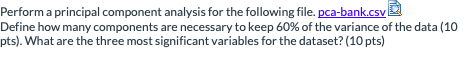

The main objective is to perform a PCA analysis in order to determine which are the most significant variables of the dataset, as well as to calculate an appropriate number of components that are capable to explain an acceptable percentage of the dataset.

First, the necessary libraries were imported to the notebook. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Afterwards, the corresponding file was loaded. A thorough analysis of the dataset is necessary to properly build the PCA.

In [3]:
df_pca=pd.read_csv('/content/drive/MyDrive/pca-bank.csv',sep=";")
df_pca=pd.DataFrame(df_pca)
display(df_pca)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


The first step to analyze the data was to make sure that it didn´t contain missing values. 

In [4]:
print(df_pca.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Once it was determined that the dataset did not contain any null values, it was necessary to check all the different data types that the dataset contains.

In [5]:
df_pca.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Now we are going to find out how many different categories are contained in each "object type" so we can better understand our data and represent them with numerical values. 

In [6]:
job_counts = df_pca["job"].value_counts()
print(job_counts)


admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64


In [7]:
marital_counts = df_pca["marital"].value_counts()
print(marital_counts)

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64


In [8]:
education_counts = df_pca["education"].value_counts()
print(education_counts)

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64


In [9]:
default_counts = df_pca["default"].value_counts()
print(default_counts)

no         3315
unknown     803
yes           1
Name: default, dtype: int64


In [10]:
housing_counts = df_pca["housing"].value_counts()
print(housing_counts)

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64


In [11]:
loan_counts = df_pca["loan"].value_counts()
print(loan_counts)

no         3349
yes         665
unknown     105
Name: loan, dtype: int64


In [12]:
contact_counts = df_pca["contact"].value_counts()
print(contact_counts)

cellular     2652
telephone    1467
Name: contact, dtype: int64


In [13]:
month_counts = df_pca["month"].value_counts()
print(month_counts)

may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: month, dtype: int64


In [14]:
dayofweek_counts = df_pca["day_of_week"].value_counts()
print(dayofweek_counts)

thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64


In [15]:
poutcome_counts = df_pca["poutcome"].value_counts()
print(poutcome_counts)

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64


In [16]:
y_counts = df_pca["y"].value_counts()
print(y_counts)

no     3668
yes     451
Name: y, dtype: int64


The following algorithm was performed to assign a numerical value to the categorical data in order for it to be suitable to perform a PCA.

In [17]:
from sklearn import preprocessing

In [18]:
le = preprocessing.LabelEncoder() #vuelvo las variables categóricas a numéricas
for v in ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'poutcome', 'y']:
    x=df_pca[v]
    d=pd.crosstab(index=x, columns='count')
    ind=d.index
    ind=ind[0:len(ind)]
    ind=ind.astype('category')
    le.fit(ind)
    df_pca[v]=le.transform(x)

df2PCA=pd.DataFrame(df_pca) #nuevo dataframe
display(df2PCA)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,474,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,343,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,224,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,14,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,55,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,50,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,2,0,1,3,0,216,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,1,61,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,510,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


Afterwards, the data was standarized so that the dataset would contain the same types of data, since some are continuous while others are not, and because there is a lot of range variability between them. Once the data was standarized with the StandardScaler() function, the PCA model was performed on the new standarized dataset. Four components were chosen by default to perform the analysis. 

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
ss=StandardScaler().fit_transform(df2PCA) #standarizing the data types
model=PCA(n_components=4)
pca=model.fit_transform(ss)

The extent of the PCA model was corroborated by using the .shape function.

In [21]:
pca.shape #to make sure that the PCA with 4 components has been carried out properly. 

(4119, 4)

The dataset below was then obtained to evaluate which variables are more significant for the dataset.

In [22]:
pd.DataFrame(model.components_[0,:], df2PCA.columns)

,0
age,0.003045
job,0.017924
marital,0.051795
education,0.054179
default,-0.121435
housing,0.037772
loan,-0.004588
contact,-0.247196
month,0.082529
day_of_week,-0.014636


As it can be observed from the data frame above, **the most significant variables of the dataset are emp.var.rate (-0.452073), euribor3m (-0.454586) and nr.employed (-0.431094)**

Once that the PCA was performed, the data was analyzed to understand how useful the number of principal components that were used (four) actually are to explain the information of the dataset, as well as to be able to choose, if necessary, an ideal amount of components for the model. To achieve this, the explained variance ratio was calculated. This measurement corresponds to the percentage of variance that is attributed by each of the selected components. As it can be observed in the figure and dataframe below, this analysis showed that **7 components are necessary to explain 60% of the variance of the data**, 14 to reach 90% and up to 16 for 95%.  

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.20774,0.295717,0.371466,0.435711,0.49484,0.549114,0.601253,0.650253,0.697723,0.742321,0.785804,0.829083,0.871374,0.905865,0.933583,0.959745,0.982256,0.9947,0.998686,0.999663,1.0


Text(0, 0.5, 'Cumulative explained variance')

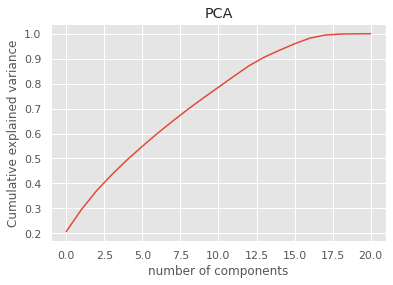

In [23]:
pca1= PCA().fit(ss)
x=np.cumsum(pca1.explained_variance_ratio_)
x=x.reshape(1,21)
TableComp=pd.DataFrame(x, columns= ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'])
display(TableComp)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.title('PCA')
plt.xlabel('number of components')
plt.ylabel('Cumulative explained variance')

The obtained results show that if the number of components from the current PCA are kept, the model will only be able to explain around 43% of the dataset.